In [73]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import torch

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [74]:
import os
from pathlib import Path

from getAttentionLib import ActivationPatchingResult, cluster_logits_diffs

root = Path("vqa_patching")
n_img_tokens = 256
clustered_logit_diffs = []
for p in [root / p for p in os.listdir(root)]:
    pr = ActivationPatchingResult.load(p)
    cld = cluster_logits_diffs(pr.get_logit_diff(), n_img_tokens=n_img_tokens)
    clustered_logit_diffs.append(cld)
clustered_logit_diffs = torch.stack(clustered_logit_diffs)
clustered_logit_diffs.shape

torch.Size([13, 4, 26])

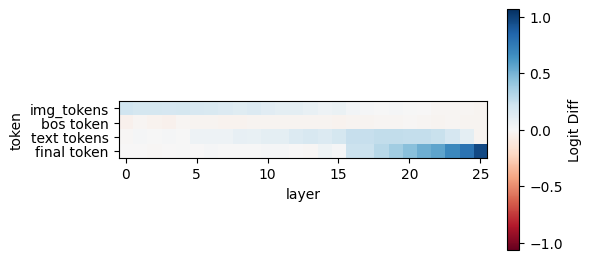

In [75]:
from getAttentionLib import plot_img_and_text_probs_side_by_side, plot_pooled_probs_plt


plot_pooled_probs_plt(
    pooled_probs=clustered_logit_diffs.mean(dim=0).T,
    inputs_tokens=["img tokens", "bos token", "text tokens", "final token"],
    cbar_label="Logit Diff",
    cmax=(cmax := clustered_logit_diffs.abs().max()),
    cmin=-cmax,
    cmap="RdBu",
    n_img_tokens=1,
    figsize=(6, 3),
).show()

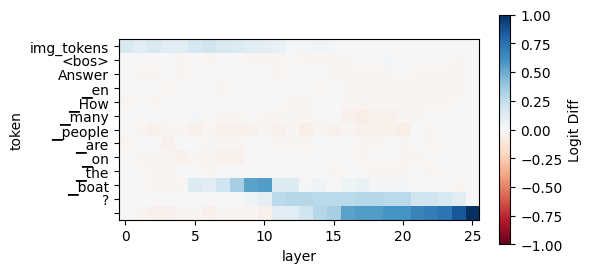

In [76]:
from getAttentionLib import maxpool_img_tokens


pooled_logits = maxpool_img_tokens(pr.get_logit_diff(), n_img_tokens=n_img_tokens)
plot_pooled_probs_plt(
    pooled_probs=pooled_logits,
    inputs_tokens=pr.metadata["token_strings"],
    cbar_label="Logit Diff",
    cmax=(cmax := pr.get_logit_diff().abs().max()),
    cmin=-cmax,
    cmap="RdBu",
    n_img_tokens=n_img_tokens,
    figsize=(6, 3),
).show()